# Tarefa 1: Aprendizado Supervisionado

**Autor**: Matheus Jericó Palhares <br>
**LinkedIn**: https://linkedin.com/in/matheusjerico <br>
**Github**: https://github.com/matheusjerico

### 1) Tarefa 1: implementar a função “predict_KNN(pontos, ponto)”, que recebe o conjunto de treinamento e o ponto cuja classe será predita e retornada

- Para a tarefa 1: um scatter plot 3D mostrando os pontos de treinamento, os pontos que estão sendo preditos (acima deles, deve haver uma annotation com a classe em que foram classificados) e um código de cores intuitivo.
- Compare os seus resultados com os obtidos através do sklearn.neighbors.KNeighborsClassifier e do sklearn.neighbors.KNeighborsRegressor. Os seus resultados e os resultados do sklearn deveriam ser iguais.

### Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

## Tarefa 1

### 1. Carregando dados

In [2]:
dataset = pd.read_csv("./Dataset/heart.csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
dataset = dataset[['age', 'chol', 'thalach', 'target']]

### 3. Criando classe do KNN

In [4]:
class KNN:
    def __init__(self, features, labels, k=3):
        self.features = np.array(features)
        self.labels = np.array(labels)
        self.k = k
        
    def fit(self, inX):
        diff_squared = (self.features - inX) ** 2
        euclidean_distances = np.sqrt(diff_squared.sum(axis=1))
        
        sorted_dist_indices = euclidean_distances.argsort()[:self.k]
                
        class_count = {}
        for i in sorted_dist_indices:
            vote_label = self.labels[i]
            class_count[vote_label] = class_count.get(vote_label, 0) + 1
            
        sorted_class_count = sorted(class_count.items(),
                                   key=lambda kv: (kv[1], kv[0]),
                                   reverse=True)
        
        return sorted_class_count[0][0]
    
    
    def predict(self, test_set):
        preds = []
        for sample in test_set:
            preds.append(self.fit(sample))
        
        return np.array(preds)

### 4. DIvidindo dados 

In [5]:
def train_test_split(dataset, test_size=0.3, random_state=0):
    np.random.seed(random_state)
    _dataset = np.array(dataset)
    np.random.shuffle(_dataset)
    
    threshold = int(_dataset.shape[0] * test_size)
    X_test = _dataset[:threshold, :-1]
    Y_test = _dataset[:threshold, -1]
    X_train = _dataset[threshold:, :-1]
    Y_train = _dataset[threshold:, -1]
    
    return X_train, X_test, Y_train, Y_test


In [6]:
X_train, X_test, y_train, y_test = train_test_split(dataset, test_size=0.3, random_state=7)

### 4. Visualizando Graficamente (3D)

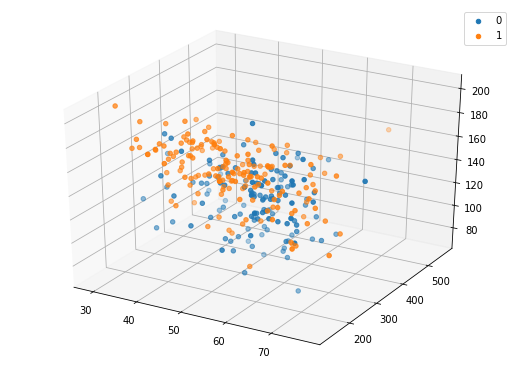

In [11]:
def plot3d(dataset):
    dim = 3
    n_features = dataset.shape[1] - 1     
    classes = np.unique(dataset.iloc[:, -1])
    
    combs = list(itertools.combinations(np.arange(n_features), dim))
    
    for x, y, z in combs:
        fig = plt.figure(figsize=(7, 5))
        ax = Axes3D(fig)
        for c in classes:
            samples = dataset[(dataset.iloc[:, -1] == c)]
            ax.scatter(samples.iloc[:, x], samples.iloc[:, y], samples.iloc[:, z])
        plt.legend(classes)
        plt.show()
       

plot3d(dataset)

### 5. Comparando modelos 

In [8]:
clf = KNN(features=X_train, labels=y_train, k=3)
preds = clf.predict(test_set=X_test)
print('Acurácia KNN scratch: {}'.format(accuracy_score(y_test, preds)))

Acurácia KNN scratch: 0.6222222222222222


In [14]:
knn_sklearn = KNeighborsClassifier(n_neighbors=3)
knn_sklearn.fit(X_train, y_train)
preds = knn_sklearn.predict(X_test)
print('Acurácia KNN scikit-learn: {}'.format(accuracy_score(y_test, preds)))

Acurácia KNN scikit-learn: 0.6222222222222222
